In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_path = '../data/raw/Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv' 

# Cargar el archivo con el separador correcto (punto y coma)
df = pd.read_csv(data_path, sep=';', engine='python')

# Diccionario para decodificar las horas codificadas
HOURS = {
    0: "7:00", 1: "7:30", 2: "8:00", 3: "8:30", 4: "9:00", 5: "9:30", 6: "10:00", 
    7: "10:30", 8: "11:00", 9: "11:30", 10: "12:00", 11: "12:30", 12: "13:00", 
    13: "13:30", 14: "14:00", 15: "14:30", 16: "15:00", 17: "15:30", 18: "16:00", 
    19: "16:30", 20: "17:00", 21: "17:30", 22: "18:00", 23: "18:30", 24: "19:00",
    25: "19:30", 26: "20:00"
}

# Decodificar la columna 'Hour (Coded)' usando el diccionario de horas
df['Hour_decoded'] = df['Hour (Coded)'].map(HOURS)

# Mostrar los primeros registros con las horas decodificadas
print("Primeros registros después de decodificar las horas:")
print(df[['Hour (Coded)', 'Hour_decoded']].head())

# Mostrar información general del dataset para verificar que esté correcto
print("\nInformación del dataset:")
print(df.info())
df


Primeros registros después de decodificar las horas:
   Hour (Coded) Hour_decoded
0             1         7:30
1             2         8:00
2             3         8:30
3             4         9:00
4             5         9:30

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Hour (Coded)                           135 non-null    int64 
 1   Immobilized bus                        135 non-null    int64 
 2   Broken Truck                           135 non-null    int64 
 3   Vehicle excess                         135 non-null    int64 
 4   Accident victim                        135 non-null    int64 
 5   Running over                           135 non-null    int64 
 6   Fire vehicles                          135 non-null    int64 
 7   Occurrence involving freight      

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,"Slowness in traffic (%),",Hour_decoded
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1",7:30
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6",8:00
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7",8:30
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2",9:00
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1",9:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,23,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,"17,8",18:30
131,24,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"18,1",19:00
132,25,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"17,7",19:30
133,26,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,"17,4",20:00


In [2]:
#Estadistica Descriptiva
df.describe()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore
count,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,14.00000,0.340741,0.874074,0.029630,0.422222,0.118519,0.007407,0.007407,0.007407,0.118519,0.007407,0.118519,0.051852,0.229630,0.044444,0.125926,0.014815
std,7.81789,0.659749,1.102437,0.170195,0.696116,0.346665,0.086066,0.086066,0.086066,0.504485,0.086066,0.712907,0.222554,0.818998,0.206848,0.464077,0.121261
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.00000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,8.000000,1.000000,4.000000,1.000000


In [3]:
# Identificar Valores Nulos
df.isnull().sum()  


Hour (Coded)                             0
Immobilized bus                          0
Broken Truck                             0
Vehicle excess                           0
Accident victim                          0
Running over                             0
Fire vehicles                            0
Occurrence involving freight             0
Incident involving dangerous freight     0
Lack of electricity                      0
Fire                                     0
Point of flooding                        0
Manifestations                           0
Defect in the network of trolleybuses    0
Tree on the road                         0
Semaphore off                            0
Intermittent Semaphore                   0
Slowness in traffic (%),                 0
Hour_decoded                             5
dtype: int64

In [52]:
#Renombrar Variable Objetivo 
df.rename(columns={'Slowness in traffic (%),': 'Slowness in traffic (%)'}, inplace=True)

In [53]:
#Reemplazar delimitador de variable objetivo por . para convertir a tipo numerico
df['Slowness in traffic (%)'] = df['Slowness in traffic (%)'].str.replace(',', '.')

# Convertir la variable objetivo a tipo numérico
df['Slowness in traffic (%)'] = pd.to_numeric(df['Slowness in traffic (%)'], errors='coerce')


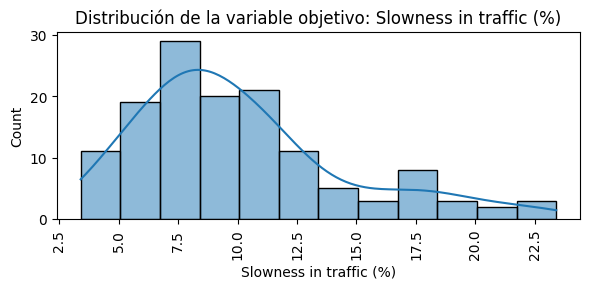

In [54]:

#Distribucion de la variable Objetivo
plt.figure(figsize=(6, 3))
sns.histplot(df['Slowness in traffic (%)'], kde=True)
plt.title('Distribución de la variable objetivo: Slowness in traffic (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

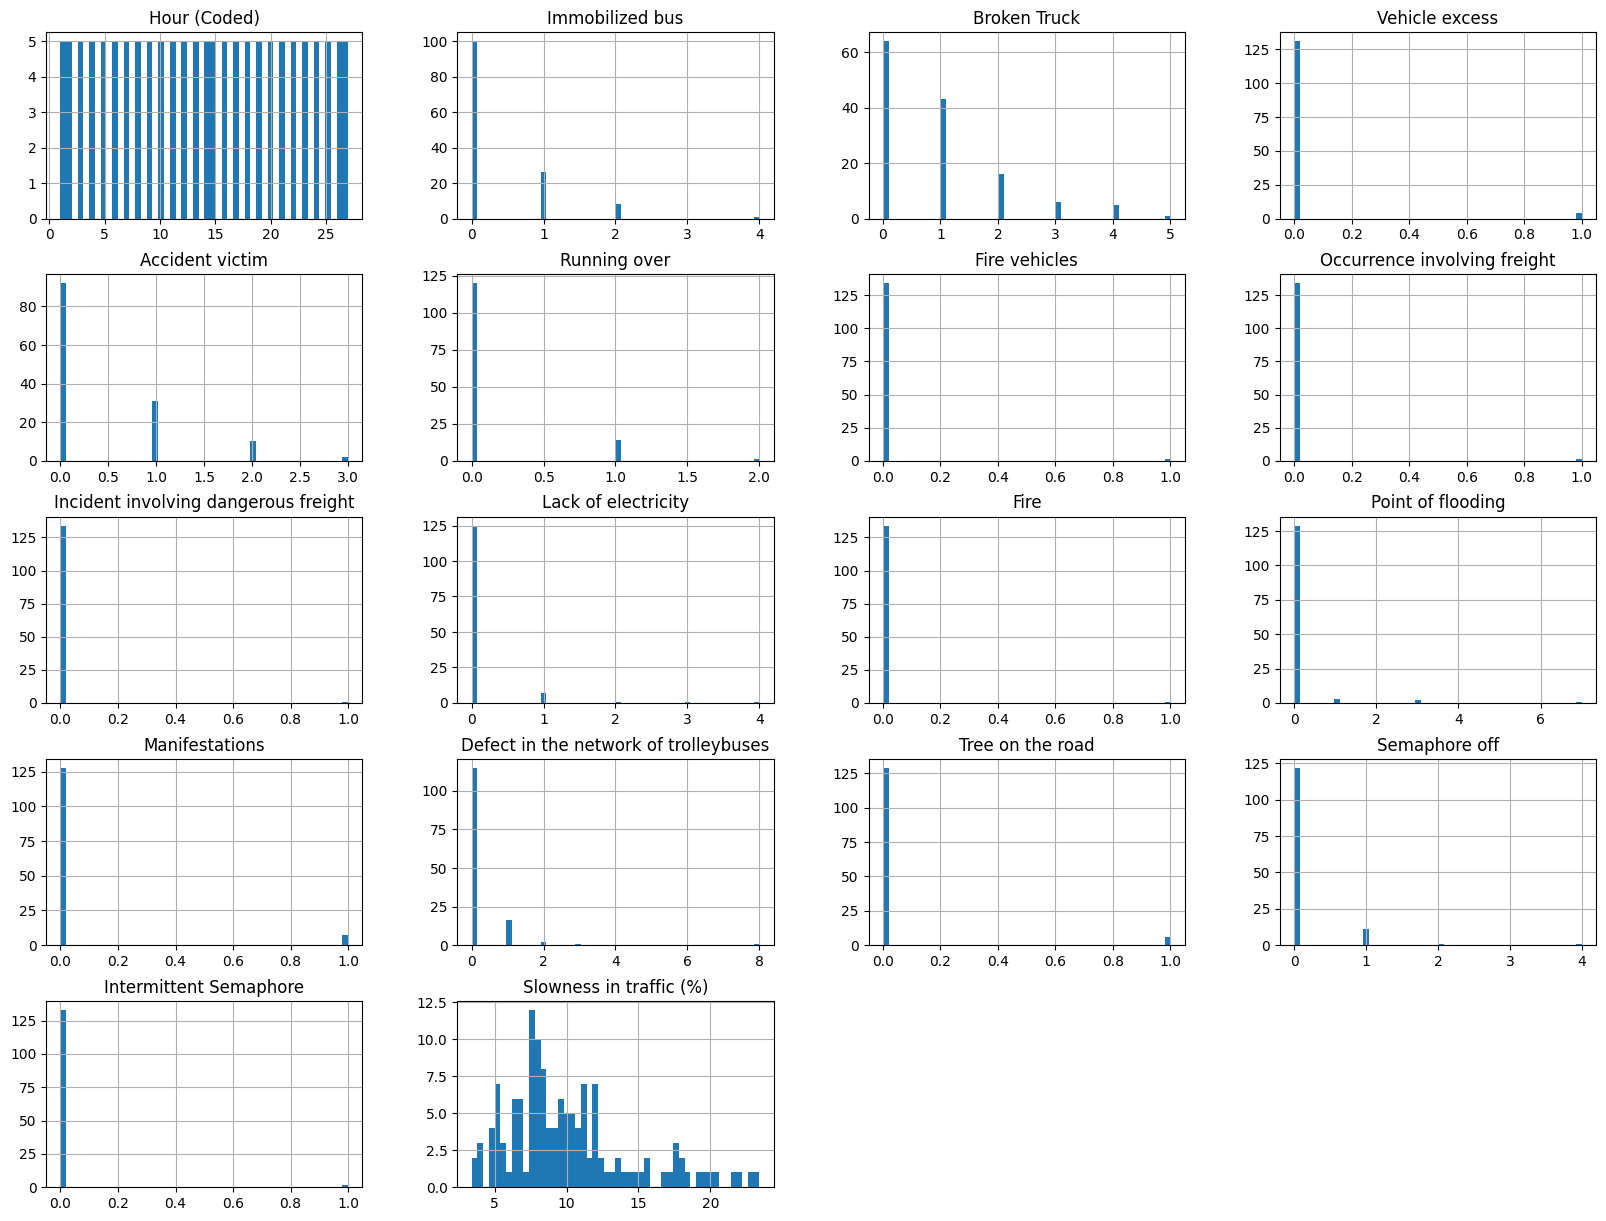

In [64]:
#Distribucion de las variables numericas
df.hist(bins=50, figsize=(20, 15))
plt.show()

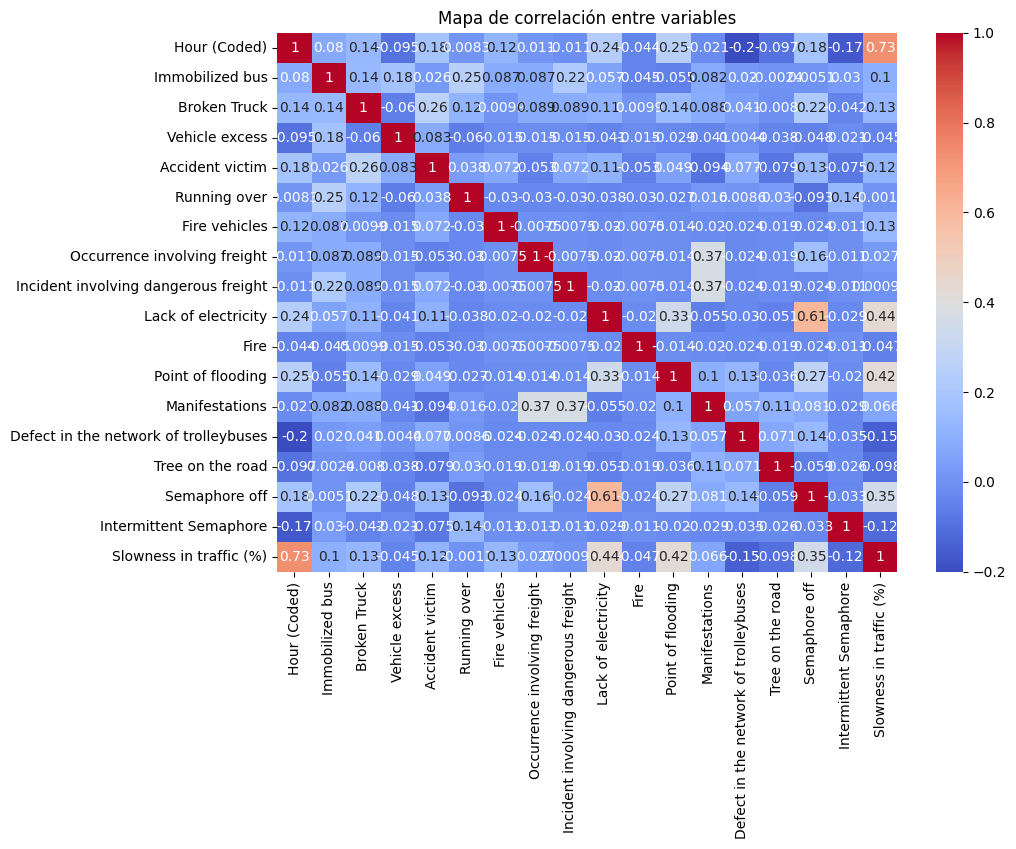

In [60]:
numeric_df = df.select_dtypes(include=[np.number])

# Generar el mapa de calor con las correlaciones
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de correlación entre variables')
plt.show()

In [66]:
corr_matrix = numeric_df.corr()
corr_matrix['Slowness in traffic (%)'].sort_values(ascending=False)

Slowness in traffic (%)                  1.000000
Hour (Coded)                             0.729962
Lack of electricity                      0.436569
Point of flooding                        0.420016
Semaphore off                            0.347242
Fire vehicles                            0.134103
Broken Truck                             0.131998
Accident victim                          0.121730
Immobilized bus                          0.101143
Manifestations                           0.066377
Occurrence involving freight             0.026791
Incident involving dangerous freight     0.000957
Running over                            -0.001133
Vehicle excess                          -0.045297
Fire                                    -0.046737
Tree on the road                        -0.098489
Intermittent Semaphore                  -0.119942
Defect in the network of trolleybuses   -0.147035
Name: Slowness in traffic (%), dtype: float64

#Preprocesamiento de Datos

In [68]:
# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Rellenar los valores NaN en las columnas numéricas con la media de cada columna
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Verificar si se rellenaron los valores faltantes
print(df.isnull().sum())


Hour (Coded)                             0
Immobilized bus                          0
Broken Truck                             0
Vehicle excess                           0
Accident victim                          0
Running over                             0
Fire vehicles                            0
Occurrence involving freight             0
Incident involving dangerous freight     0
Lack of electricity                      0
Fire                                     0
Point of flooding                        0
Manifestations                           0
Defect in the network of trolleybuses    0
Tree on the road                         0
Semaphore off                            0
Intermittent Semaphore                   0
Slowness in traffic (%)                  0
Hour_decoded                             5
dtype: int64
